## Machine learning 

 Par CHACHA Ali Ahmed Bachir
 
 chachaaliahmed0@gmail.com
 
 ESGF@2022 BD 5ème année

## Modules nécessaires à ce Jupyter Notebook

In [58]:
#import usuel

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import seaborn as sns
import scipy.stats as stat
import sqldf as sqldf

import nltk
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score



## Nettoyage des données

In [59]:
# récupération des données
data = pd.read_csv('/Users/aliahmedbachirchacha/Documents/tp_machine_learning/dataset.csv')

In [60]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,"2,55",17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,"3,39",17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,"2,75",17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,"3,39",17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850.0,United Kingdom


In [61]:
data = data[data['Quantity']>=0]

In [62]:
data[['InvoiceNo', 'Quantity', 'UnitPrice', 'CustomerID']]=data[['InvoiceNo', 'Quantity', 'UnitPrice', 'CustomerID']].fillna(0)

In [63]:
#modification du format de date

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], errors='coerce')
data['InvoiceDate']= data['InvoiceDate'].dt.strftime("%Y-%m-%d")

In [64]:
#le bon type pour le colonnes de type int, float

data['UnitPrice'] = data['UnitPrice'].apply(lambda x: x.replace(',', '.'))
data['UnitPrice']=data['UnitPrice'].astype(float)
data['CustomerID']=data['CustomerID'].astype(int)


In [66]:
#Ajout des colonnes year, month, day

data['day'] = pd.DatetimeIndex(data['InvoiceDate']).day
data['month'] = pd.DatetimeIndex(data['InvoiceDate']).month
data['year'] = pd.DatetimeIndex(data['InvoiceDate']).year

In [67]:
#Suppression des doublons dans la table
data = data.drop_duplicates()

### Question 1 - Volume

In [68]:
query_customer = """
    SELECT CustomerID, InvoiceNo, avg(Quantity) as avg_number_products
    FROM data
    group by CustomerID, InvoiceNo
"""

In [69]:
df_customer_mean = sqldf.run(query_customer)

In [70]:
df_customer_mean

,CustomerID,InvoiceNo,avg_number_products
0,0,536414,56.000000
1,0,536544,2.292220
2,0,536545,1.000000
3,0,536546,1.000000
4,0,536547,1.000000
...,...,...,...
20723,18283,579673,2.640000
20724,18283,580872,2.840000
20725,18287,554065,16.827586
20726,18287,570715,26.052632


In [71]:
final_result = df_customer_mean.groupby('CustomerID').mean().reset_index()

In [72]:
final_result.head()

,CustomerID,avg_number_products
0,0,28.121002
1,12346,74215.000000
2,12347,13.799245
3,12348,75.016176
4,12349,8.643836


In [73]:
len(final_result)

4340

In [74]:
display = final_result.sort_values('avg_number_products',ascending=False).head(20)

<AxesSubplot:xlabel='CustomerID'>

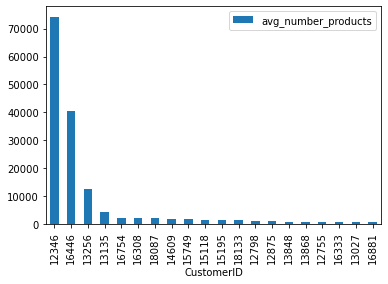

In [75]:
display.plot(kind='bar', x='CustomerID', y='avg_number_products')

### Nombre médian et la moyenne de produits acheté lors d’une dépense, par pays

In [78]:
volume = pd.DataFrame()

In [79]:
volume['average'] = data.groupby('Country')['Quantity'].mean()

In [80]:
volume['median'] = data.groupby('Country')['Quantity'].apply(np.median)

In [81]:
volume= volume.reset_index()

In [82]:
volume.head()

,Country,average,median
0,Australia,71.114020,32.0
1,Austria,12.263819,10.0
2,Bahrain,17.444444,6.0
3,Belgium,11.441162,10.0
4,Brazil,11.125000,10.0


#### Affichage du graphe en prenant que 15 pays

In [91]:
display_volum = volume.head(35)

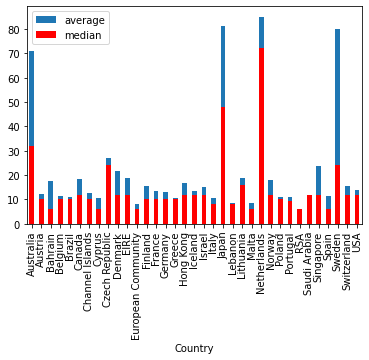

In [92]:
ax = plt.gca()

display_volum.plot(kind='bar',x='Country',y='average',ax=ax)
display_volum.plot(kind='bar',x='Country',y='median', color='red', ax=ax)

plt.show()

### Question 2 - Montant

#### montant dépensé par un client généralement

In [93]:
query_customer_UnitPrice = """
    SELECT CustomerID, InvoiceNo, avg(UnitPrice*Quantity) as mean
    FROM data
    group by CustomerID, InvoiceNo
"""

In [94]:
df_customer_mean_price = sqldf.run(query_customer_UnitPrice)

#### Pour chaque client la moyenne du montant dépensé, grouper par l'id su client de ses différentes dépense

In [95]:
df_customer_mean_price.head()

,CustomerID,InvoiceNo,mean
0,0,536414,0.000000
1,0,536544,10.476546
2,0,536545,0.000000
3,0,536546,0.000000
4,0,536547,0.000000


#### la moyenne générale du montant dépensé de toutes les dépenses pour chacun des clients (que les top 35 dans le graphe)

In [96]:
# calcul de la moyenne globale
customer_amount = df_customer_mean_price.groupby('CustomerID').mean().reset_index()


In [97]:
customer_amount.head()

,CustomerID,mean
0,0,17.428182
1,12346,77183.600000
2,12347,23.096997
3,12348,66.789412
4,12349,24.076027


In [98]:
display_customer_amount = customer_amount.sort_values('mean',ascending=False).head(35)

<AxesSubplot:xlabel='CustomerID'>

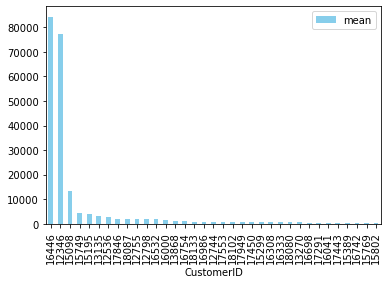

In [99]:
display_customer_amount.plot(kind='bar', x='CustomerID', y='mean', color='skyblue')

#### montant moyen et le montant médian d’un panier client, par pays

In [100]:

# copie de la table de base dans une table de "test"
data_test = data.copy(deep=True)


In [101]:

# création d'un dataframe vide qui stockera le resultat final
montant = pd.DataFrame()


In [102]:

# pour chaque ligne on calcule le montant dépensé == prix unitaire * quantité
data_test['cart_amount'] = data_test[['Quantity', 'UnitPrice']].apply(lambda x : (x['Quantity'] * x['UnitPrice']), 1)

In [103]:

# ajout de la colonne average qui correspond à la moyenne dépensé en groupant par pays<
montant['average'] = data_test.groupby('Country')['cart_amount'].mean()


In [105]:
# ajout de la colonne median qui correspond à la mediane du montant dépensé en groupant par pays<
montant['median'] = data_test.groupby('Country')['cart_amount'].apply(np.median)


In [106]:
montant= montant.reset_index()

In [107]:
montant

,index,Country,average,median
0,0,Australia,116.937340,NaN
1,1,Austria,25.624824,NaN
2,2,Bahrain,41.896667,NaN
3,3,Belgium,20.283772,NaN
4,4,Brazil,35.737500,NaN
5,5,Canada,24.280662,NaN
6,6,Channel Islands,27.363507,NaN
7,7,Cyprus,22.392786,NaN
8,8,Czech Republic,33.069600,NaN
9,9,Denmark,49.882474,NaN


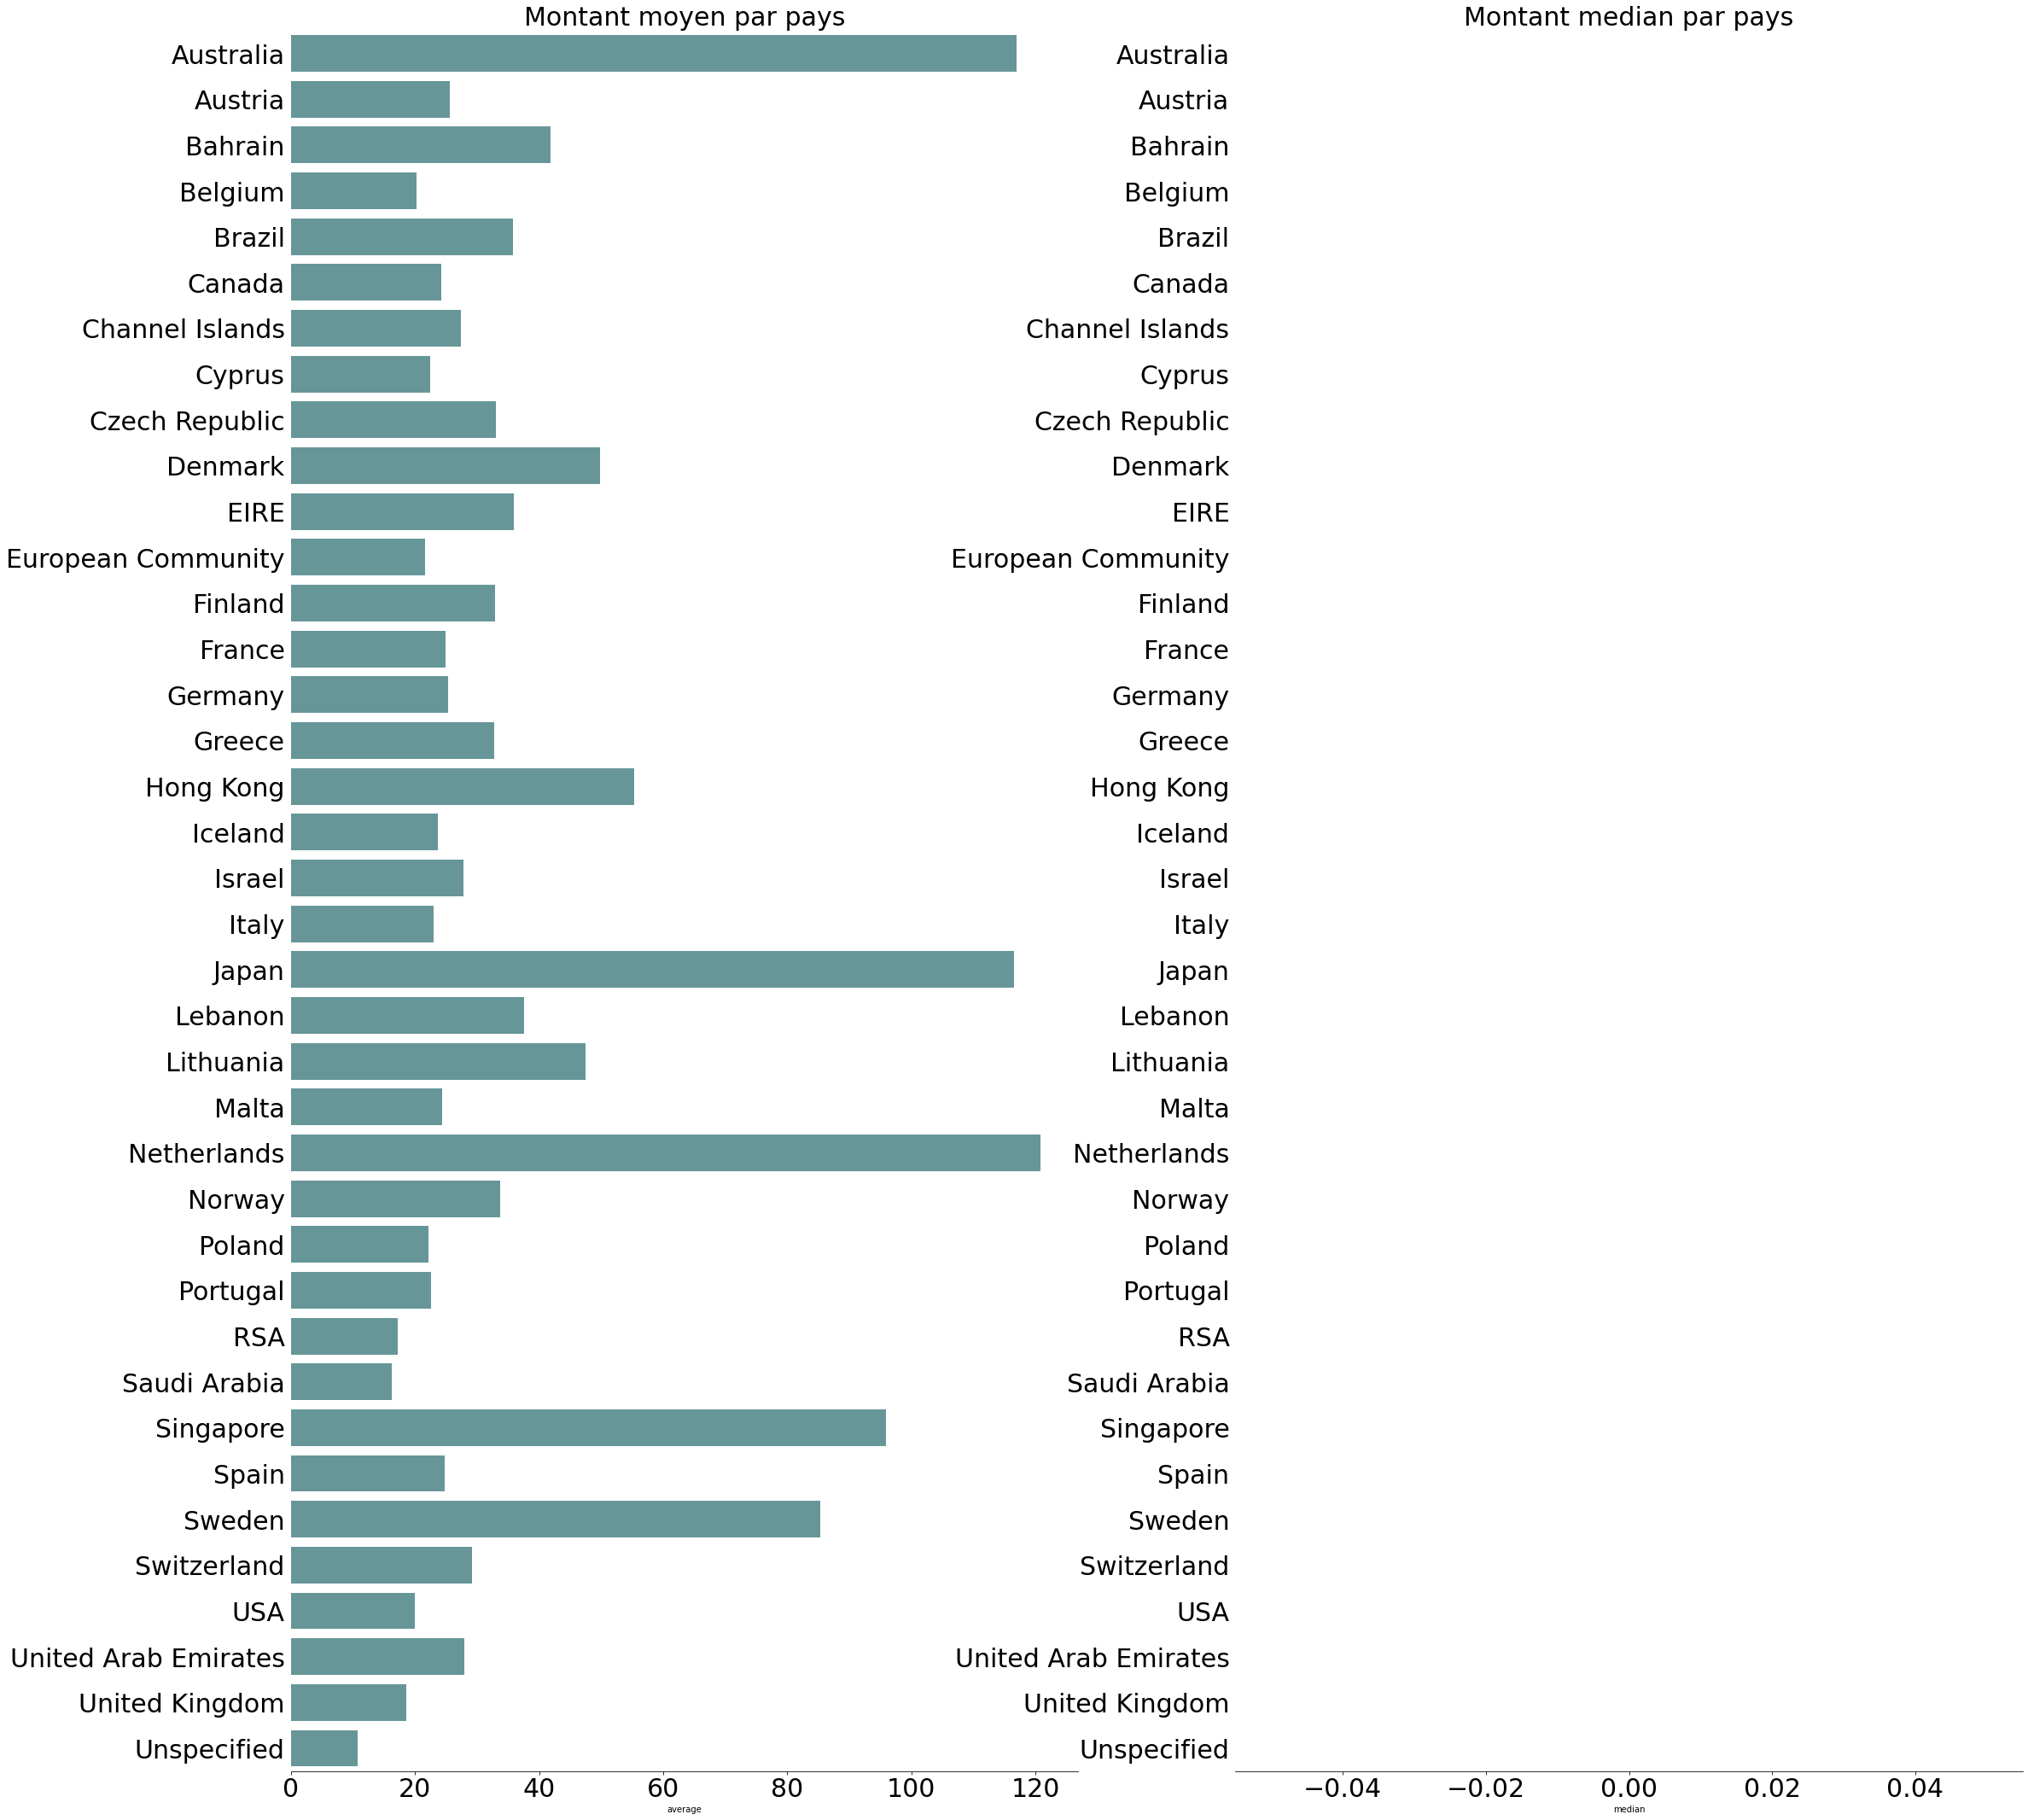

In [108]:
fig, ax = plt.subplots(figsize=(30,30))
fig.tight_layout(pad=5)

def plot_hor_bar(subplot, data):
    plt.subplot(1,2,subplot)
    if subplot==1:
        ax = sns.barplot(y='Country', x='average', data=data,
                     color='cadetblue')
        plt.title("Montant moyen par pays",
          fontsize=30)
    else : 
        ax = sns.barplot(y='Country', x='median', data=data,
                     color='skyblue')
        plt.title("Montant median par pays",
          fontsize=30)
    plt.xticks(fontsize=30)
    plt.ylabel(None)
    plt.yticks(fontsize=30)
    sns.despine(left=True)
    ax.grid(False)
    ax.tick_params(bottom=True, left=False)
    return None

plot_hor_bar(1, montant[['Country', 'average']])
plot_hor_bar(2, montant[['Country', 'median']])

plt.show()

## Question 3 - Volume


#### top-5 produits les plus vendus durant le premier trimestre 2011

In [109]:
# Requête SQL pour calculer le cumul de quantité vendus pour chaque produit
top_5_products = """
    SELECT StockCode as code_produits, sum(Quantity) as total_vente
    FROM data
    where year=2011 and month between 1 and 3
    group by StockCode 
    order by total_vente desc
    limit 5
"""

In [110]:
df_top_5_products = sqldf.run(top_5_products)

##### Top 5 des produits vendus au premier trimestre avec le total de ventes

In [111]:
df_top_5_products

,code_produits,total_vente
0,23166,74215
1,85099B,11109
2,21212,9477
3,85123A,9403
4,84077,8898


###### top-5 produits les plus vendus durant le second trimestre 2011

In [112]:
top_5_products_second_trimestre = """
    SELECT StockCode, sum(Quantity) as total_quantity
    FROM data
    where year=2011 and month between 4 and 6
    group by StockCode 
    order by total_quantity desc
    limit 5
"""

In [113]:
df_top_5_products_second_trimestre = sqldf.run(top_5_products_second_trimestre)

In [114]:
df_top_5_products_second_trimestre

,StockCode,total_quantity
0,84077,17310
1,85123A,13525
2,22197,10805
3,15036,9996
4,85099B,9759


## Question 4 - Montant

#### les 5 pays qui ont générés le plus gros chiffre d’affaire pendant le premier trimestre 2011

In [115]:
CA_country = """
    SELECT Country, sum(Quantity * UnitPrice) as CA
    FROM data
    where year=2011 and month between 1 and 3
    group by Country 
    order by CA desc
"""

In [116]:
df_CA_country = sqldf.run(CA_country)

In [117]:
df_CA_country = df_CA_country.head(5)

In [118]:
df_CA_country

,Country,CA
0,United Kingdom,1573773.23
1,Netherlands,72039.56
2,EIRE,56305.44
3,Australia,40937.12
4,Germany,40854.58


### Question 5 - Montant moyen et du montant médian d’un panier client pour chacun de ces cinq pays

In [119]:
df = data[(data['Country'].isin(df_CA_country.Country)) & (data['year']==2011) & (data['month'].between(1,3))]

In [120]:
df['cart_amount'] = df[['Quantity', 'UnitPrice']].apply(lambda x : (x['Quantity'] * x['UnitPrice']), 1)

<ipython-input-120-b663b4943a10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cart_amount'] = df[['Quantity', 'UnitPrice']].apply(lambda x : (x['Quantity'] * x['UnitPrice']), 1)


In [121]:
evol = pd.DataFrame()

In [122]:
evol['median'] = df.groupby(['Country', 'month'])['cart_amount'].apply(np.median)

In [123]:
evol['average'] = df.groupby(['Country', 'month'])['cart_amount'].mean()

In [124]:
evol = evol.reset_index()

In [125]:
evol_Australia = evol[evol['Country']=='Australia']

In [126]:
evol_EIRE = evol[evol['Country']=='EIRE']

In [127]:
evol_France = evol[evol['Country']=='France']

In [128]:
evol_Netherlands = evol[evol['Country']=='Netherlands']

In [129]:
evol_United_Kingdom = evol[evol['Country']=='United Kingdom']

In [130]:
evol

,Country,month,median,average
0,Australia,1,33.00,71.005591
1,Australia,2,136.00,165.117079
2,Australia,3,119.60,159.481389
3,EIRE,1,30.00,126.613815
4,EIRE,2,15.30,28.380791
5,EIRE,3,17.00,39.780484
6,Germany,1,15.60,21.725663
7,Germany,2,17.70,32.368412
8,Germany,3,17.00,24.944003
9,Netherlands,1,76.50,116.205939


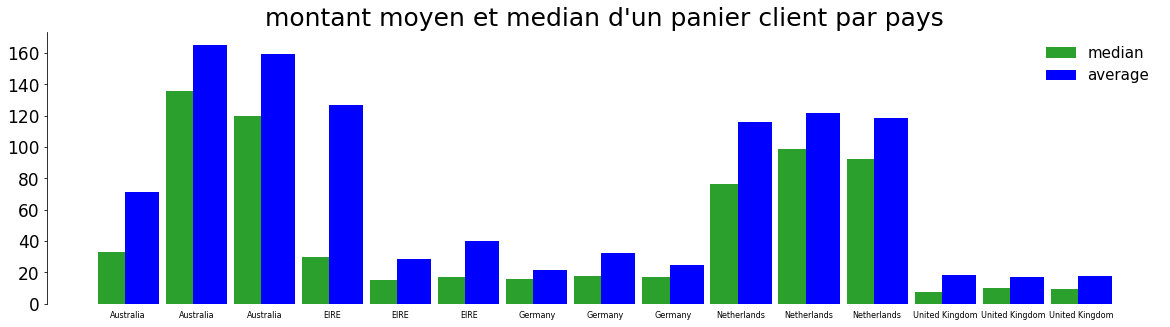

In [133]:
fig, ax = plt.subplots(figsize=(20,5))
x = np.arange(len(evol))
width = 0.5
plt.bar(x-0.2, evol['median'],
        width, color='tab:green', label='median')
plt.bar(x+0.2, evol['average'],
        width, color='blue', label='average')
plt.title('montant moyen et median d\'un panier client par pays', fontsize=25)
plt.xlabel(None)
plt.xticks(evol.index, evol['Country'], fontsize=8)
plt.yticks(fontsize=17)
sns.despine(bottom=True)
ax.grid(False)
ax.tick_params(bottom=False, left=True)
plt.legend(frameon=False, fontsize=15)
plt.show()


### Question 6 - à quelle fréquence dépensent les 100 plus gros clients du RoyaumeUni

In [134]:
united_kingdom = """
    SELECT CustomerID, sum(Quantity) quantity, sum(Quantity*UnitPrice) price
    FROM data
    where Country='United Kingdom'
    group by CustomerID 
    order by quantity desc
    limit 100
"""

In [135]:
united_kingdom = sqldf.run(united_kingdom)

In [136]:
united_kingdom

,CustomerID,quantity,price
0,0,464292,1.694595e+06
1,16446,80997,1.684725e+05
2,12346,74215,7.718360e+04
3,17450,69973,1.943908e+05
4,17511,64549,9.106238e+04
...,...,...,...
95,13316,5508,5.732930e+03
96,13001,5490,9.785970e+03
97,16705,5476,1.403499e+04
98,13018,5435,7.277700e+03


## Modèles

In [137]:
data_test = data.copy(deep=True)

In [138]:
data_test['cart_amount'] = data_test[['Quantity', 'UnitPrice']].apply(lambda x : (x['Quantity'] * x['UnitPrice']), 1)

In [139]:
data_model = data_test[['InvoiceDate', 'UnitPrice', 'Quantity', 'cart_amount', 'Country', 'year', 'month', 'day']]

In [140]:
data_model.head()

,InvoiceDate,UnitPrice,Quantity,cart_amount,Country,year,month,day
0,2010-12-01,2.55,6,15.30,United Kingdom,2010,12,1
1,2010-12-01,3.39,6,20.34,United Kingdom,2010,12,1
2,2010-12-01,2.75,8,22.00,United Kingdom,2010,12,1
3,2010-12-01,3.39,6,20.34,United Kingdom,2010,12,1
4,2010-12-01,3.39,6,20.34,United Kingdom,2010,12,1


In [141]:
data_model = data_model.groupby(['InvoiceDate', 'year', 'month', 'day']).agg({'cart_amount':'sum'}).reset_index()

In [142]:
data_model

,InvoiceDate,year,month,day,cart_amount
0,2010-12-01,2010,12,1,58776.79
1,2010-12-02,2010,12,2,47629.42
2,2010-12-03,2010,12,3,46898.63
3,2010-12-05,2010,12,5,31364.63
4,2010-12-06,2010,12,6,54624.15
...,...,...,...,...,...
300,2011-12-05,2011,12,5,88620.84
301,2011-12-06,2011,12,6,56558.83
302,2011-12-07,2011,12,7,75315.55
303,2011-12-08,2011,12,8,82371.55


### Model training

In [143]:
x = data_model[['year', 'month', 'day']]
y = data_model['cart_amount']

In [144]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2)

In [145]:
print("X_train = " , X_train.shape)
print("X_test = " , X_test.shape)
print("Y_train = " , Y_train.shape)
print("Y_test = " , Y_test.shape)

X_train =  (244, 3)
X_test =  (61, 3)
Y_train =  (244,)
Y_test =  (61,)


In [147]:
model = RandomForestRegressor()

In [148]:
rf = model.fit(X_train, Y_train)

In [149]:
predict = rf.predict(X_test)

In [150]:
rf.score(X_train, Y_train)

0.8854880001276523

### Prédiction

In [151]:
model = RandomForestRegressor()

In [152]:
rf = model.fit(x, y)

In [153]:
list_day = [i for i in range(10,32)]
list_day.append(3)

In [154]:
data_december = pd.DataFrame.from_dict({'year': [2011 for i in range(len(list_day))],
                'month': [12 for i in range(len(list_day))],
                'day': list_day
                })

In [155]:
data_december_final = data_december.copy(deep=True)

In [156]:
data_december_final['cart_amount']=rf.predict(data_december)

In [157]:
data_december_final.head()

,year,month,day,cart_amount
0,2011,12,10,133470.8954
1,2011,12,11,107353.7736
2,2011,12,12,96930.8479
3,2011,12,13,98111.7128
4,2011,12,14,108517.4898


In [158]:
data_model_december = data_model[(data_model['year']==2011) & (data_model['month']==12)][['year', 'month', 'day','cart_amount']]

In [159]:
data_december_final = pd.concat([data_model_december, data_december_final], ignore_index=True)

In [160]:
data_december_final.sort_values('day')

,year,month,day,cart_amount
0,2011,12,1,52068.6300
1,2011,12,2,57476.4800
30,2011,12,3,55429.9835
2,2011,12,4,24477.4700
3,2011,12,5,88620.8400
4,2011,12,6,56558.8300
5,2011,12,7,75315.5500
6,2011,12,8,82371.5500
7,2011,12,9,200900.9800
8,2011,12,10,133470.8954


In [161]:
print("le CA en décembre 2011 sera de : " + '\033[1m' +  str(data_december_final.cart_amount.sum()))

le CA en décembre 2011 sera de : 2632630.0742000015


### Achat réalisé en france en Décembre 2011

In [162]:
data_purchase = data[['InvoiceNo', 'CustomerID', 'InvoiceDate', 'UnitPrice', 'Quantity', 'Country', 'year', 'month', 'day']]

In [163]:
data_purchase = data_purchase.groupby(['Country', 'CustomerID', 'InvoiceDate', 'year', 'month', 'day']).agg({'InvoiceNo':'count'})

In [164]:
data_purchase = data_purchase.reset_index()

In [165]:
data_purchase = data_purchase.rename({'InvoiceNo': 'purchase_count'}, axis=1)  # new method

In [166]:
data_purchase

,Country,CustomerID,InvoiceDate,year,month,day,purchase_count
0,Australia,12386,2010-12-08,2010,12,8,8
1,Australia,12386,2011-01-06,2011,1,6,2
2,Australia,12388,2011-01-17,2011,1,17,19
3,Australia,12388,2011-02-07,2011,2,7,6
4,Australia,12388,2011-03-09,2011,3,9,10
...,...,...,...,...,...,...,...
17081,Unspecified,12743,2011-07-28,2011,7,28,131
17082,Unspecified,14265,2011-07-14,2011,7,14,15
17083,Unspecified,14265,2011-08-22,2011,8,22,16
17084,Unspecified,16320,2011-05-10,2011,5,10,47


In [167]:
x_puchase = data_purchase[['year', 'month', 'day']]
y_purchase = data_purchase['purchase_count']

In [168]:
rf_purchase = model.fit(x_puchase, y_purchase)

In [169]:
# Pour avoir les jours manquants du mois de décembre 2011 du 10 au 31 mais aussi la journée du 3
list_day_purchas = [i for i in range(10,32)]
list_day_purchas.append(3)

In [170]:
december_purchas = pd.DataFrame.from_dict({'year': [2011 for i in range(len(list_day_purchas))],
                'month': [12 for i in range(len(list_day_purchas))],
                'day': list_day_purchas
                })

In [171]:
december_purchas.sort_values('day')

,year,month,day
22,2011,12,3
0,2011,12,10
1,2011,12,11
2,2011,12,12
3,2011,12,13
4,2011,12,14
5,2011,12,15
6,2011,12,16
7,2011,12,17
8,2011,12,18


In [172]:
december_purchas['purchase_count']=rf.predict(december_purchas)

In [173]:
december_purchas

,year,month,day,purchase_count
0,2011,12,10,46.154440
1,2011,12,11,52.148350
2,2011,12,12,40.424159
3,2011,12,13,43.871855
4,2011,12,14,35.351717
5,2011,12,15,31.249654
6,2011,12,16,25.729479
7,2011,12,17,45.492650
8,2011,12,18,43.464201
9,2011,12,19,29.546527


In [174]:
data_purchase_december = data_purchase[(data_purchase['year']==2011) & (data_purchase['month']==12 ) & (data_purchase['Country']=='France')][['CustomerID','year', 'month', 'day','purchase_count']]

In [175]:
final_data_purchase_december = pd.concat([data_purchase_december, december_purchas], ignore_index=True)

In [176]:
final_data_purchase_december.sort_values('day')

,CustomerID,year,month,day,purchase_count
2,12553.0,2011,12,1,10.000000
3,12562.0,2011,12,1,22.000000
10,12684.0,2011,12,2,6.000000
11,12695.0,2011,12,2,3.000000
12,12700.0,2011,12,2,57.000000
39,NaN,2011,12,3,32.630001
1,12490.0,2011,12,4,26.000000
16,12724.0,2011,12,4,8.000000
14,12719.0,2011,12,4,21.000000
9,12683.0,2011,12,5,35.000000


In [177]:
print("le nombre de clients à réaliser au moins un achat en France en décembre 2011 sera de : " +  str(final_data_purchase_december.count()))

le nombre de clients à réaliser au moins un achat en France en décembre 2011 sera de : CustomerID        17
year              40
month             40
day               40
purchase_count    40
dtype: int64
